In [1]:
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
x_coor = []
y_coor = []

In [3]:
file = open('ChicagoSketch_node.txt','r')
data = file.readlines()
for i in data:
    point = i.split()
    x_coor.append(float(point[1]))
    y_coor.append(float(point[2]))
length = len(x_coor)
d = np.zeros([length,length])
for i in range(length):
    y_coor[i] = y_coor[i] - 1900000

In [4]:
def distance(i,j):
    return abs(x_coor[i]-x_coor[j])+abs(y_coor[i]-y_coor[j])

In [5]:
for i in range(0,length):
    for j in range(i+1,length):
        d[i][j]=distance(i,j)
        d[j][i]=d[i][j]
d = 0.000189393939*d # Covert feet to mile
d

array([[ 0.        ,  1.82897727,  2.96420454, ..., 81.67329528,
        65.33863623, 54.61704534],
       [ 1.82897727,  0.        ,  3.65795454, ..., 82.36704528,
        66.03238623, 55.31079534],
       [ 2.96420454,  3.65795454,  0.        , ..., 78.70909075,
        62.37443169, 51.6528408 ],
       ...,
       [81.67329528, 82.36704528, 78.70909075, ...,  0.        ,
        30.71420448, 35.1289772 ],
       [65.33863623, 66.03238623, 62.37443169, ..., 30.71420448,
         0.        , 10.72159089],
       [54.61704534, 55.31079534, 51.6528408 , ..., 35.1289772 ,
        10.72159089,  0.        ]])

In [6]:
mean_dist = np.mean(d)
mean_dist

46.749415505527445

In [7]:
file2 = open('ChicagoSketch_arc.txt','r')
data2 = file2.readlines()
arcs=[]
for i in data2:
    point = i.split()
    arcs.append((int(point[0])-1,int(point[1])-1))

In [8]:
coordinate = {}
for i in range(length):
    coordinate[i] = x_coor[i],y_coor[i]
coordinate

{0: (690309.0, 76022.0),
 1: (683649.0, 73025.0),
 2: (693306.0, 63368.0),
 3: (686313.0, 58373.0),
 4: (696636.0, 46718.0),
 5: (671328.0, 68030.0),
 6: (676323.0, 57041.0),
 7: (655677.0, 67031.0),
 8: (649350.0, 52712.0),
 9: (665667.0, 49049.0),
 10: (666333.0, 33398.0),
 11: (676323.0, 35396.0),
 12: (677988.0, 24407.0),
 13: (679653.0, 45719.0),
 14: (688977.0, 36062.0),
 15: (692307.0, 25739.0),
 16: (700965.0, 35396.0),
 17: (702963.0, 27404.0),
 18: (704295.0, 19412.0),
 19: (678654.0, 12752.0),
 20: (691641.0, 17747.0),
 21: (705294.0, 11087.0),
 22: (693972.0, 6425.0),
 23: (679653.0, 4760.0),
 24: (664002.0, -6229.0),
 25: (680652.0, -8893.0),
 26: (694971.0, -10225.0),
 27: (707625.0, 98.0),
 28: (710955.0, -15553.0),
 29: (680319.0, -21880.0),
 30: (696303.0, -26209.0),
 31: (689643.0, -38197.0),
 32: (705627.0, -48853.0),
 33: (705960.0, -34867.0),
 34: (722610.0, -23878.0),
 35: (723609.0, -43858.0),
 36: (625374.0, 65033.0),
 37: (550449.0, 113984.0),
 38: (590076.0, 1

# 1. Before Removing Highest betweeness

In [9]:
G=nx.DiGraph()
for i in range(length):
    G.add_node(i)
# print(arcs)
for i in arcs:
#     print(i[0],i[1])
    G.add_edge(i[0],i[1],length = d[i[0]][i[1]])

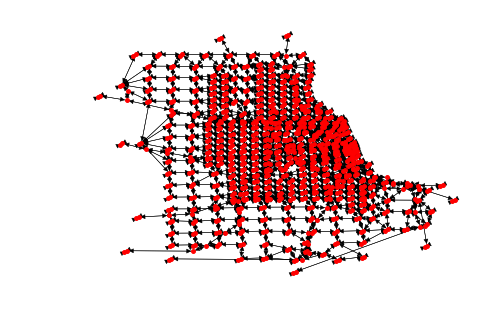

In [10]:
## Drawing the network
nx.draw(G, pos=coordinate, node_size=15,width=0.5)
plt.axis('off')
plt.savefig("Chicago1.png")
z=plt.show()

In [11]:
G.number_of_nodes(),G.number_of_edges()

(933, 2950)

## 1.1 Betweeness

In [12]:
before_bet=nx.betweenness_centrality(G)

In [13]:
avg_before_bet = sum(before_bet.values())/len(before_bet)
avg_before_bet

0.012541879775289753

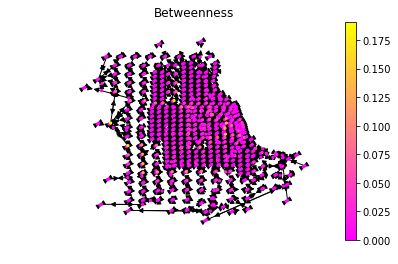

In [14]:
# Betweenness
nodes=nx.draw_networkx_nodes(G, pos=coordinate, node_size=5, cmap=plt.cm.spring, node_color=list(before_bet.values()), nodelist=G.nodes())
# cmap:colormap
nx.draw_networkx_edges(G, pos=coordinate)
# nx.draw_networkx_labels(G, pos=coordinate)

plt.title("Betweenness")
plt.colorbar(nodes)
plt.axis('off')#去掉axis
plt.savefig("Chicago2.png")
z=plt.show()

In [15]:
sorted_before_bet = sorted(before_bet.items(),key=lambda item:item[1],reverse = True)

## 1.2 Variance and Freeman of Betweeness

In [16]:
## Variance of betweenness
averageCentrality = sum(list(before_bet.values()))/G.number_of_nodes()
variance_bet = 0
for i in before_bet:
    variance_bet += (before_bet[i]-averageCentrality)**2/G.number_of_nodes()

## Freeman of betweenness
maxCentrality = max(list(before_bet.values()))
Freeman_bet = 0
for i in before_bet:
    Freeman_bet += (maxCentrality - before_bet[i])/(G.number_of_nodes()*(G.number_of_nodes()-1))
print(variance_bet,Freeman_bet)

0.0004928455646134679 0.00019099514953323327


## 1.3 Average of shortest path length 

In [17]:
before_dij = dict(nx.all_pairs_dijkstra_path_length(G,weight='length'))

In [18]:
nx.is_strongly_connected(G) #如果是connected, 那么总的shortest path的条数就是下面chunk那样

True

In [19]:
number_of_sp = (G.number_of_nodes()*(G.number_of_nodes()-1))/2
number_of_sp

434778.0

In [20]:
before_length = 0
for key,value in before_dij.items():
    for key2,value2 in value.items():
        before_length += value2
avg_before_sp = before_length/number_of_sp
avg_before_sp

100.14191013026667

## 1.4 Average Closeness

In [21]:
before_clo = nx.closeness_centrality(G)

In [22]:
avg_before_clo = sum(before_clo.values())/len(before_clo)
avg_before_clo

0.08003457381272129

# 2. Remove Highest betweeness

In [23]:
num_removing = math.ceil(G.number_of_nodes()*0.05)
num_removing

47

In [24]:
# sorted_before_bet[:num_removing]

In [25]:
for key,item in sorted_before_bet[:num_removing]:
    G.remove_node(key)

In [26]:
G.number_of_nodes(),G.number_of_edges()

(886, 2504)

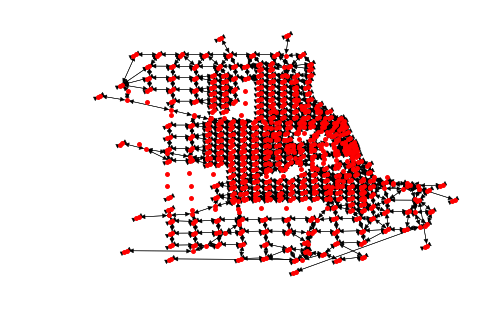

In [27]:
## Drawing the network
nx.draw(G, pos=coordinate, node_size=15,width=0.5)
plt.axis('off')
plt.savefig("Chicago3.png")
z=plt.show()

In [28]:
# ## Delete those point with zero degree
# zeroDegrees=[]
# for i in G.nodes():
#     if G.degree(i)==0:
#         zeroDegrees.append(i)
         
# for node in zeroDegrees:
#     G.remove_node(node)

In [29]:
# ## Drawing the network
# nx.draw(G, pos=coordinate, node_size=15,width=0.5)
# plt.axis('off')
# #plt.savefig("name.png")
# z=plt.show()

# 3. After Removing Highest Betweeness

## 3.1 Betweeness 

In [30]:
after_bet=nx.betweenness_centrality(G)

In [31]:
avg_after_bet = sum(after_bet.values())/len(after_bet)
avg_after_bet

0.01467195046220948

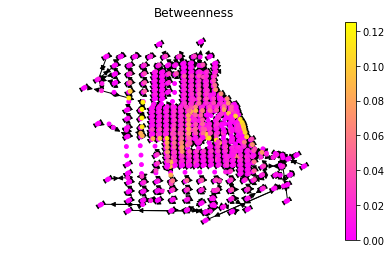

In [32]:
# Betweenness
nodes=nx.draw_networkx_nodes(G, pos=coordinate, node_size=15, cmap=plt.cm.spring, node_color=list(after_bet.values()), nodelist=G.nodes())
# cmap:colormap
nx.draw_networkx_edges(G, pos=coordinate)
# nx.draw_networkx_labels(G, pos=coordinate)

plt.title("Betweenness")
plt.colorbar(nodes)
plt.axis('off')#去掉axis
plt.savefig("Chicago4.png")
z=plt.show()

## Variance and Freeman of Betweeness

In [33]:
## Variance of betweenness
averageCentrality = sum(list(after_bet.values()))/G.number_of_nodes()
variance_bet = 0
for i in after_bet:
    variance_bet += (after_bet[i]-averageCentrality)**2/G.number_of_nodes()

## Freeman of betweenness
maxCentrality = max(list(after_bet.values()))
Freeman_bet = 0
for i in after_bet:
    Freeman_bet += (maxCentrality - after_bet[i])/(G.number_of_nodes()*(G.number_of_nodes()-1))
print(variance_bet,Freeman_bet)

0.0005499617731863199 0.0001245716660724882


## Average of shortest path length 

In [34]:
after_dij = dict(nx.all_pairs_dijkstra_path_length(G,weight='length'))

In [35]:
nx.is_strongly_connected(G)

False

In [36]:
for i in nx.strongly_connected_components(G):
    print(i)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 27, 28, 29, 30, 32, 33, 34, 35, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 77, 78, 79, 80, 81, 82, 83, 85, 86, 89, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 163, 164, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,

In [37]:
count = 5
for i in nx.strongly_connected_components(G):
    if len(i) ==1:
        count += 1
count

44

In [38]:
number_of_sp = ((G.number_of_nodes()-count)*(G.number_of_nodes()-count-1))/2
number_of_sp

354061.0

In [39]:
after_length = 0
for key,value in after_dij.items():
    for key2,value2 in value.items():
        after_length += value2
avg_after_sp = after_length/number_of_sp
avg_after_sp

108.06697600376131

## Average Closeness

In [40]:
after_clo = nx.closeness_centrality(G)

In [41]:
avg_after_clo = sum(after_clo.values())/len(after_clo)
avg_after_clo

0.0597993214596205

# 4. Connect Lowest Betweeness

In [42]:
sorted_after_bet = sorted(after_bet.items(),key=lambda item:item[1])

In [43]:
num_add = 0
for i,j in sorted_after_bet:
    if j == 0.0:
        num_add +=1
num_add

394

In [44]:
count, a, b = 0, 0, 0
for key1, item1 in sorted_after_bet[:num_add]:
    count += 1
    shortest_path = 100000
    for key2, item2 in sorted_after_bet[count:num_add]:
        if key1 != key2:
            if distance(key1,key2)*0.000189393939 <= shortest_path:
                shortest_path = distance(key1,key2)*0.000189393939
                a = key1
                b = key2
    G.add_edge(a,b,length = shortest_path)
    G.add_edge(b,a,length = shortest_path)

In [45]:
nx.is_strongly_connected(G)

True

In [46]:
# sorted(nx.betweenness_centrality(G).items(),key=lambda item:item[1])

In [47]:
G.number_of_edges()

3288

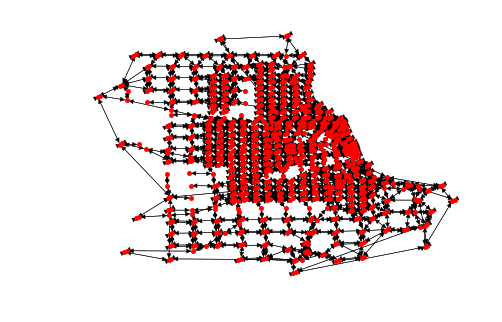

In [48]:
## Drawing the network
nx.draw(G, pos=coordinate, node_size=15,width=0.5)
plt.axis('off')
plt.savefig("Chicago5.png")
z=plt.show()

# 5. After Connecting Lowest Betweeness

## 5.1 Betweeness

In [49]:
add_bet=nx.betweenness_centrality(G)

In [50]:
avg_add_bet = sum(add_bet.values())/len(add_bet)
avg_add_bet

0.011454523389373472

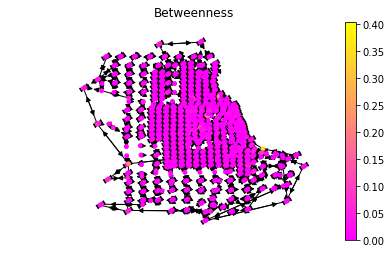

In [51]:
# Betweenness
nodes=nx.draw_networkx_nodes(G, pos=coordinate, node_size=15, cmap=plt.cm.spring, node_color=list(add_bet.values()), nodelist=G.nodes())
# cmap:colormap
nx.draw_networkx_edges(G, pos=coordinate)
# nx.draw_networkx_labels(G, pos=coordinate)

plt.title("Betweenness")
plt.colorbar(nodes)
plt.axis('off')#去掉axis
plt.savefig("Chicago6.png")
z=plt.show()

## 5.2 Variance and Freeman of Betweeness

In [52]:
## Variance of betweenness
averageCentrality = sum(list(add_bet.values()))/G.number_of_nodes()
variance_bet = 0
for i in add_bet:
    variance_bet += (add_bet[i]-averageCentrality)**2/G.number_of_nodes()

## Freeman of betweenness
maxCentrality = max(list(add_bet.values()))
Freeman_bet = 0
for i in add_bet:
    Freeman_bet += (maxCentrality - add_bet[i])/(G.number_of_nodes()*(G.number_of_nodes()-1))
print(variance_bet,Freeman_bet)

0.0006562938079598497 0.00044301724972786396


## 5.3 Average of shortest path length

In [53]:
add_dij = dict(nx.all_pairs_dijkstra_path_length(G,weight='length'))

In [54]:
number_of_sp = ((G.number_of_nodes())*(G.number_of_nodes()-1))/2
number_of_sp

392055.0

In [55]:
after_add_length = 0
for key,value in add_dij.items():
    for key2,value2 in value.items():
        after_add_length += value2
avg_add_sp = after_add_length/number_of_sp
avg_add_sp

105.45437275244109

## 5.4 Average Closeness

In [56]:
add_clo = nx.closeness_centrality(G)

In [57]:
avg_add_clo = sum(add_clo.values())/len(add_clo)
avg_add_clo

0.09120705395239775

# 6. Percent Change

## 6.1 From Graph1 to Graph2  

Average Betweeness

In [58]:
(avg_after_bet - avg_before_bet)/avg_before_bet

0.16983663733696702

Average Shortest Path

In [59]:
(avg_after_sp - avg_before_sp)/avg_before_sp

0.07913835339455336

Average Closeness

In [60]:
(avg_after_clo - avg_before_clo)/avg_before_clo

-0.2528313876006978

## 6.2 From Graph2 to Graph3

Average Betweeness

In [61]:
(avg_add_bet - avg_after_bet)/avg_after_bet

-0.21929102617427246

Average Shortest Path

In [62]:
(avg_add_sp - avg_after_sp)/avg_after_sp

-0.024175778280584908

Average Closeness

In [63]:
(avg_add_clo - avg_after_clo)/avg_after_clo

0.5252188775082562